<a href="https://colab.research.google.com/github/fernandodeeke/can2025/blob/main/interp2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1></h1></center>
<center><h1>Cálculo Numérico</h1></center>
<center><h2>CAN0001 2025/2</h2></center>
<center><h3>Prof. Fernando Deeke Sasse - CCT, UDESC</h3></center>    
<center><h2>Interpolação </h2> </center>

## 1. Interpolação Simples

Veremos um exemplo de aplicação do método de interpolação polinomial simples (com base monomial). Inicialmente carregamos as biblitecas básicas:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Suponhamos que temos dados $(x,y(x))$ tabelados na seguinte forma:

In [ ]:
x = np.array([1.,2.,3.,4.,5.])
x

array([1., 2., 3., 4., 5.])

In [ ]:
y = np.array([5.3,8.2,7.2,6.6,4.3])
y

array([5.3, 8.2, 7.2, 6.6, 4.3])

Façamos um gráfico para estes dados:

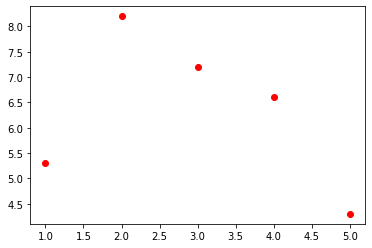

In [ ]:
plt.plot(x,y,'ro')

Como temos 5 dados, o polinômio que interpola estes pontos deve ser de quarta ordem, sendo que seus coeficientes $c$ são dados pela solução da equação matricial $Vc=y$, sendo $V$ a matriz de Vandermonde, definida por meio da seguinte função:

In [ ]:
def vandermonde(x):
    n = len(x)
    a = (n,n)
    a = np.zeros(a)
    for i in range(n):
        for j in range(n):
            a[i,j] = x[i]**j
    return a

In [ ]:
V = vandermonde(x)
V

array([[  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.],
       [  1.,   5.,  25., 125., 625.]])

Resolvamos o sistema:

In [ ]:
import numpy.linalg as la

In [ ]:
c = la.solve(V,y)
print(c)

[-12.2         29.96666667 -15.58333333   3.38333333  -0.26666667]


Uma vez que temos os coeficientes, podemos determinar o polinômio $p(t)$:

In [ ]:
def p(t,c):
        n = len(c)
        return sum(c[i]*t**i for i in range(n))

Definimos uma malha de 30 pontos para traçar o polinômio:

In [ ]:
t = np.linspace(0.9, 5.1,30)

Finalmente, fazemos o gráfico dos pontos juntamente com os polinômios:

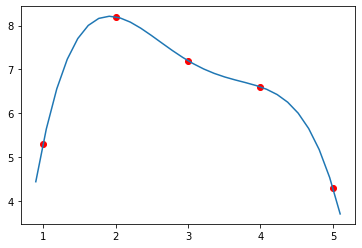

In [ ]:
plt.plot(x,y,'ro', t, p(t,c), '-')

O mesmo resultado pode ser obtido diretamente usando o seguinte comando, usando a base polinomial de Lagrange, por exemplo:

In [ ]:
from scipy.interpolate import lagrange

In [ ]:
f = lagrange(x, y)
f

poly1d([ -0.26666667,   3.38333333, -15.58333333,  29.96666667,
       -12.2       ])

Podemos usar diretamente $f$ para traçar o gráfico:

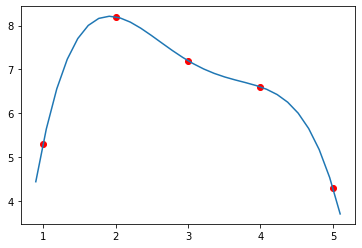

In [ ]:
plt.plot(x,y,'ro', t, f(t), '-')

## 2. Interpolação não-polinomial

Para mostrar que podemos ter uma base de funções de interpolação diferente da polinomial, apresentaremos o exemple a seguir. Suponhamos que queremos interpolar os dados:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
T = np.array([1.,2.,3.,4.])
X = np.array([3.4,4.3,6.2,4.6])

Façamos um gráfico dos dados:

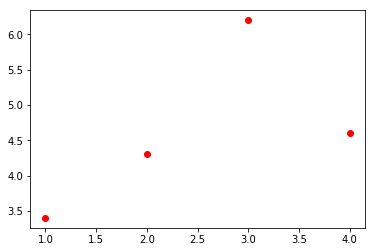

In [ ]:
plt.plot(T,X,'ro')

Usaremos a base de funções não polinomiais com as 4 funções (pois temos 4 pontos):  $\{\exp(t), 1, t, \exp(-t)\}$. Definimos uma função que gera a matrix de base:

In [ ]:
def basisE(x):
    n = len(x)
    a = (n,n)
    a = np.zeros(a)
    for j in range(n):
        a[j,0]= np.exp(x[j])
        a[j,1]= 1
        a[j,2]=x[j]
        a[j,3]= np.exp(-x[j])
    return a

No presente caso temos

In [ ]:
A=basisE(T)

Determinemos os coeficientes da combinação linear:

In [ ]:
import numpy.linalg as la

In [ ]:
x= la.solve(A,X)
x

array([-0.20504417, -8.70673594,  6.04303117, 17.99794139])

A função interpolante pode ser definida por:

In [ ]:
def f(t,c):
        return c[0]*np.exp(t)+c[1]+c[2]*t+c[3]*np.exp(-t)

Geremos 30 pontos no eixo $t$:

In [ ]:
t = np.linspace(0.9, 4.1,30)
t

array([0.9       , 1.01034483, 1.12068966, 1.23103448, 1.34137931,
       1.45172414, 1.56206897, 1.67241379, 1.78275862, 1.89310345,
       2.00344828, 2.1137931 , 2.22413793, 2.33448276, 2.44482759,
       2.55517241, 2.66551724, 2.77586207, 2.8862069 , 2.99655172,
       3.10689655, 3.21724138, 3.32758621, 3.43793103, 3.54827586,
       3.65862069, 3.76896552, 3.87931034, 3.98965517, 4.1       ])

Podemos agora visualisar o resultado:

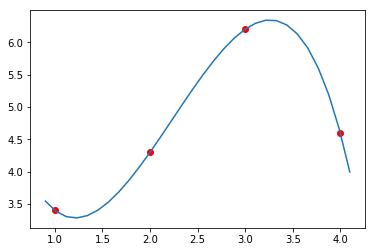

In [ ]:
plt.plot(T,X,'ro', t, f(t,x), '-')

Podemos comparar este resultado com o da interpolação polinomial de base monomial. Aqui a matriz de base é a matriz de Vandermonde:

In [ ]:
def vandermonde(y):
    n = len(y)
    a = (n,n)
    a = np.zeros(a)
    for i in range(n):
        for j in range(n):
            a[i,j] = y[i]**j
    return a

No nosso caso:

In [ ]:
V = vandermonde(T)
V

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

Os coeficientes de interpolação são:

In [ ]:
c = la.solve(V,X)
print(c)

[ 8.   -8.85  5.   -0.75]


Definimos agora o polinômio interpolante:

In [ ]:
def p(t,c):
        n = len(c)
        return sum(c[i]*t**i for i in range(n))

Façamos os gráficos, comparando este resultado com o anterior:

Text(0, 0.5, 'x(t)')

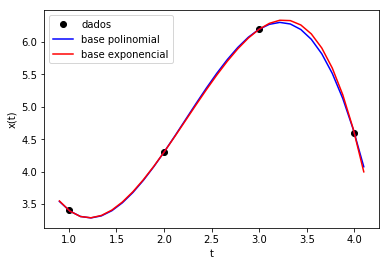

In [ ]:
plt.plot(T,X,'ro',color = 'black')
plt.plot(t, p(t,c),'-', color = 'blue')
plt.plot(t, f(t,x),'-', color = 'red')
plt.legend(["dados", "base polinomial", "base exponencial"])
plt.xlabel("t")
plt.ylabel("x(t)")

Os resultados foram bastante similares, embora as bases completemene diferentes.

## 3. Spline cúbico (interpolação por partes)

Veja este texto sobre interpolação por partes e splines: https://bit.ly/32B3r82 .

Usaremos uma biblioteca do Scipy:

In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np

Suponhamos que temos os dados:

In [ ]:
T = np.array([1.,2.,3.,4.])
X = np.array([3.4,4.3,6.2,4.6])

Visualisemos estes dados num gráfico:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

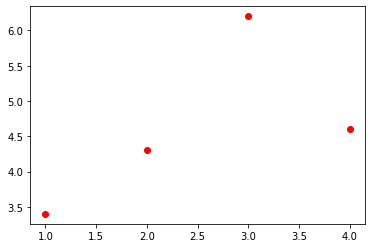

In [ ]:
plt.plot(T,X,'ro')

Podemos determinar o spline cúbico para estes pontos, como condições nos extremos de que as derivadas primeiras são 1 e -3, por exemplo:

In [ ]:
cs1 = CubicSpline(T, X, bc_type=((1, 1), (1, -3)))

Façamos o gráfico:

Text(0, 0.5, 'x(t)')

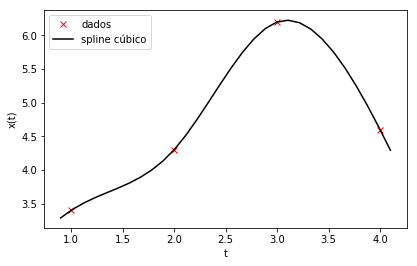

In [ ]:
ts = np.linspace(0.9, 4.1, 30)
plt.figure(figsize=(6.5, 4))
plt.plot(T, X, 'x',color = 'red')
plt.plot(ts, cs1(ts),color = 'black')
plt.legend(["dados", "spline cúbico"])
plt.xlabel("t")
plt.ylabel("x(t)")

Se desejamos encontrar o valor da função em um ponto qualquer, tal como $x=2.6$, por exemplo basta digitar:

In [ ]:
print(cs1(2.6))

5.616960000000001


Se escolhermos derivadas nulas nos extermos obteremos uma curva um pouco diferente:

In [ ]:
cs2 = CubicSpline(T, X, bc_type=((1, 0), (1, 0)))

Text(0, 0.5, 'x(t)')

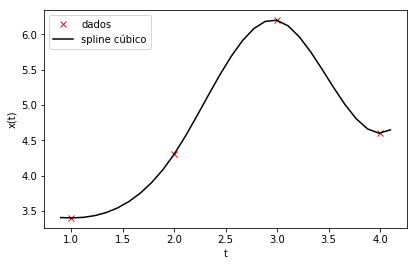

In [ ]:
ts = np.linspace(0.9, 4.1, 30)
plt.figure(figsize=(6.5, 4))
plt.plot(T, X, 'x',color = 'red')
plt.plot(ts, cs2(ts),color = 'black')
plt.legend(["dados", "spline cúbico"])
plt.xlabel("t")
plt.ylabel("x(t)")

In [ ]:
cs3 = CubicSpline(T, X, bc_type='natural')

Usemos agora o spline natural:

Text(0, 0.5, 'x(t)')

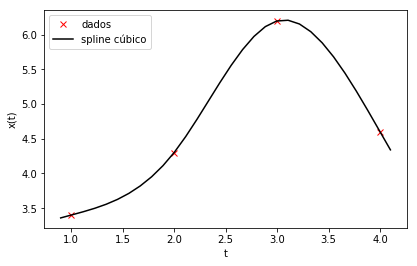

In [ ]:
ts = np.linspace(0.9, 4.1, 30)
plt.figure(figsize=(6.5, 4))
plt.plot(T, X, 'x',color = 'red')
plt.plot(ts, cs3(ts),color = 'black')
plt.legend(["dados", "spline cúbico"])
plt.xlabel("t")
plt.ylabel("x(t)")

## 3. Exemplos

**1.** Implemente a determinação das bases interpolantes de Lagrange usando esta referência: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.04-Lagrange-Polynomial-Interpolation.html


**2.** Implemente a determinação das bases interpolantes de Newton usando esta referência:
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html

**3.** Dados os pontos

|||||||
|---|---|---|---|---|---|
|$x$ |0 |0.1  | 0.2 |0.3|0.4|0.5|
|$f(x)$| 1.10 |1.13| 1.16| 1.20| 1.22 |1.26|

Determine o spline cúbico e apresente o gráfico. Escolha as condições para $f'(x)$ mais adequadas nos extremos.




In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np

In [ ]:
X = np.array([0,0.1,0.2,0.3,0.4,0.5])
F = np.array([1.1,1.13,1.16,1.20,1.22,1.26])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

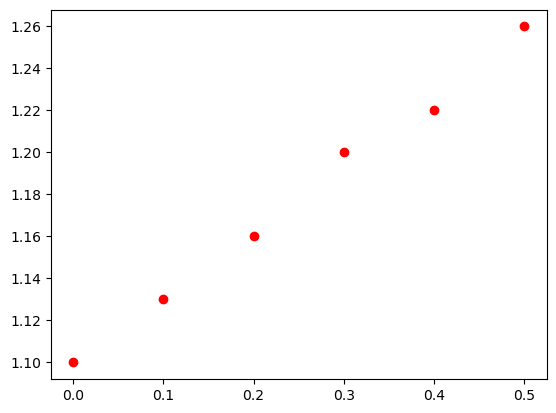

In [ ]:
plt.plot(X,F,'ro')

In [ ]:
cs1 = CubicSpline(X, F, bc_type=((1, 0.3), (1, 0.5)))

Text(0, 0.5, 'f(x)')

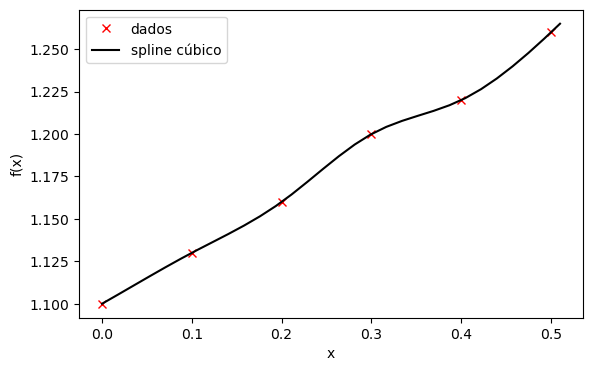

In [ ]:
ts = np.linspace(0., 0.51, 30)
plt.figure(figsize=(6.5, 4))
plt.plot(X, F, 'x',color = 'red')
plt.plot(ts, cs1(ts),color = 'black')
plt.legend(["dados", "spline cúbico"])
plt.xlabel("x")
plt.ylabel("f(x)")


**4.** Dados os pontos:

|||||||||||
|---|---|---|---|---|---|---|---|---|---|
|$x$ |0 |0.1  | 0.2 |0.3|0.4|0.5|0.6|0.7|0.8|
|$f(x)$ |1.10| 1.13| 1.16 |1.20 |1.22| 1.26| 1.30 |1.35| 1.40 |

(a) Escolha os pontos mais próximos de 0.35 e construa o polinômio interpolante com o grau que você achar mais adequado.

(b) Estime $f(0.35)$ .

Utilize comandos do sistema.

(a) Para termos uma ideia do problema utilizemos inicialmente todos os pontos, o que resultaria num polinômio de grau 8.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [ ]:
x=np.array([0. ,0.1  , 0.2 ,0.3,0.4,0.5,0.6,0.7,0.8])
f = np.array([1.10, 1.13, 1.16 ,1.20 ,1.22, 1.26, 1.30 ,1.35, 1.40])

In [ ]:
F = lagrange(x, f)
F

poly1d([-2.03373016e+03,  6.60714286e+03, -8.79861111e+03,  6.17500000e+03,
       -2.43913194e+03,  5.34041667e+02, -5.87267857e+01,  2.73547619e+00,
        1.10000000e+00])

In [ ]:
t = np.linspace(0., 0.81,80)

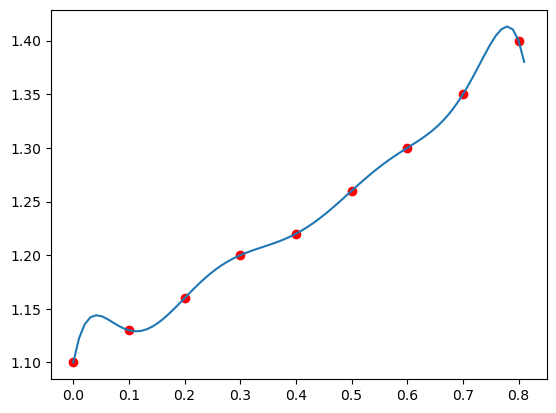

In [ ]:
plt.plot(x,f,'ro', t, F(t), '-')

Certamente os o polinômio não tem comportamento adequado nas extremidades. Tiremos dois pontos, um de cada extremidade, para determinar o polinômio interpolante de grau 6:

In [ ]:
x1=np.array([0.1  , 0.2 ,0.3,0.4,0.5,0.6,0.7])
f1 = np.array([1.13, 1.16 ,1.20 ,1.22, 1.26, 1.30 ,1.35])

In [ ]:
F1 = lagrange(x1, f1)
F1

poly1d([ 305.55555556, -750.        ,  726.38888889, -350.83333333,
         87.70555556,  -10.21666667,    1.56      ])

In [ ]:
t = np.linspace(0.1, 0.7,80)

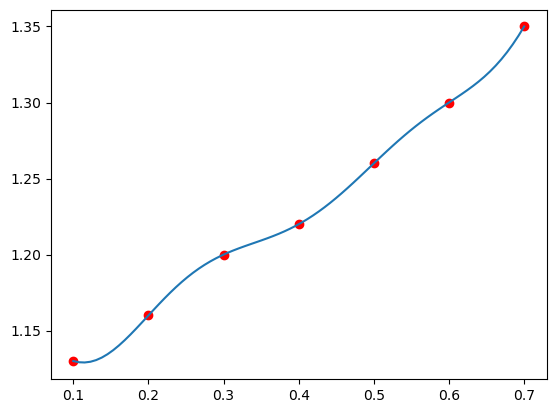

In [ ]:
plt.plot(x1,f1,'ro', t, F(t), '-')

Tiremos um ponto à esquerda e dois à direita:

In [ ]:
x2=np.array([ 0.2 ,0.3,0.4,0.5])
f2 = np.array([1.16 ,1.20 ,1.22, 1.26])

In [ ]:
F2 = lagrange(x2, f2)
F2

poly1d([ 6.66666667, -7.        ,  2.63333333,  0.86      ])

In [ ]:
t = np.linspace(0.18, 0.52,80)

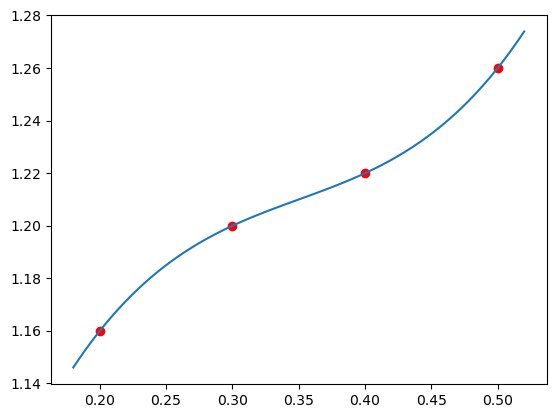

In [ ]:
plt.plot(x2,f2,'ro', t, F2(t), '-')

Portanto um polinômio de quarto grau é o que melhor descreve a interpolação próximo a 0.35:

$$
F2(t) = 6.66666667t^3 -7t^2+ 2.63333333 t+0.86 \,.
$$

(b) Neste ponto,

In [ ]:
F2(0.35)

1.209999999999984

In [ ]:
x=0.35

In [ ]:
6.66666667*x**3 -7*x**2+ 2.63333333*x+0.86

1.20999999897625

**5.** A seguinte tabela lista a população norte-americana de 1940 a 1990 (em milhares).

|||||||
|---|---|---|---|---|---|
|Ano |1940 |1950 | 1960 |1970|1980|1990|
|População| 132165 |151326| 179323| 203302| 226542 |249633|

Determine o polinômio que interpola estes dados e use este polinômio para estimar a população nos anos 1930, 1965 e 2010. A população em 1930 era de aproximadamente 123203000. Quão acurada você imagina que são as estimativas para a população em 1965 e 2010? Use comandos do sistema.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a=np.array([1940,1950,1960,1970,1980,1990])
p=np.array([132165 ,151326, 179323, 203302, 226542 ,249633])

Façamos um gráfico destes dados:

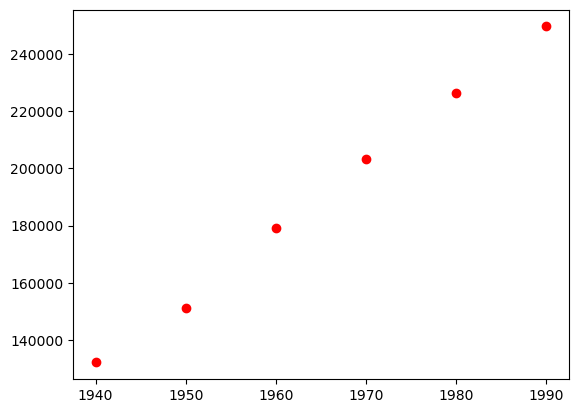

In [ ]:
plt.plot(a,p,'ro')

In [ ]:
from scipy.interpolate import lagrange

In [ ]:
f = lagrange(a, p)
f

poly1d([-1.56850000e-03,  1.54385208e+01, -6.07825210e+04,  1.19650239e+08,
       -1.17763373e+11,  4.63616253e+13])

In [ ]:
t = np.linspace(1938, 1992,80)

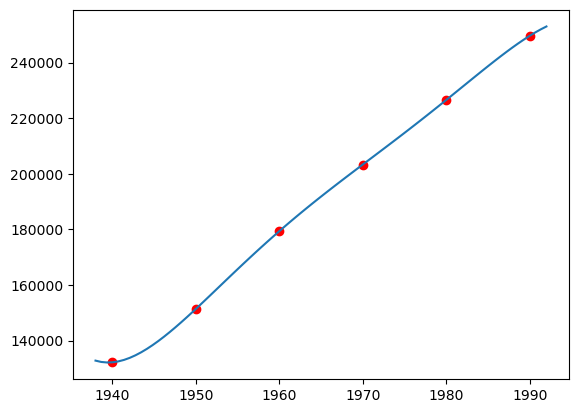

In [ ]:
plt.plot(a,p,'ro', t, f(t), '-')

Neste modelo, temos em 1965:

In [ ]:
np.ceil(f(1965.)*1000)

191765743.0

Portanto, temos uma expectativa de aproximadamente 192 milhões de habitantes em 1965. Em 2010 temos

In [ ]:
np.ceil(f(2010.)*1000)

171349571.0

Obviamente a interpolação não é apropriada para dados que estão  fora do intervalo definido pelos pontos, pois o polinômio começa a oscilar matematicamente (sem relação com a realidade). Portanto, tal polinômio interpolante não é capaz de fornecer uma estimava para a população em 2010.

## 4. Exercícios